Sales Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
data.shape

(200, 4)

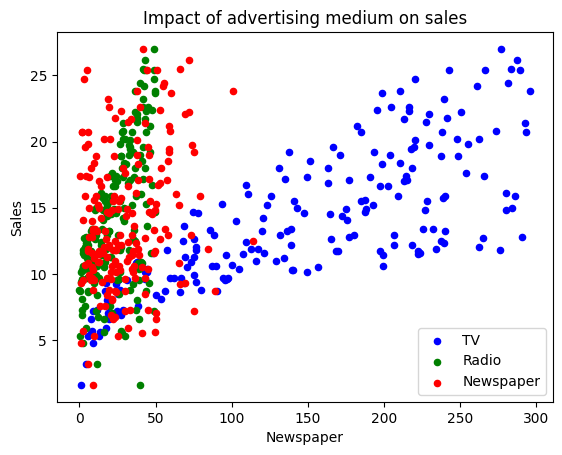

In [12]:
plot=data.plot.scatter(x="TV",y="Sales",color='b',label="TV")
data.plot.scatter(x="Radio",y="Sales",color='g',label="Radio",ax=plot)
data.plot.scatter(x="Newspaper",y="Sales",color='r',label="Newspaper",ax=plot)

plt.title("Impact of advertising medium on sales")
plt.show()

In [13]:
x=data.iloc[:,0:3]
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [14]:
y=data.iloc[:,3:]
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


Spliting of Data

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [16]:
print("X_train shape=",X_train.shape)
print("X_test shape=",X_test.shape)
print("y_train shape=",y_train.shape)
print("y_test shape=",y_test.shape)

X_train shape= (160, 3)
X_test shape= (40, 3)
y_train shape= (160, 1)
y_test shape= (40, 1)


Linear Regrssion

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
lr_pred=lr_model.predict(X_test)


In [18]:
print('MAE:', metrics.mean_absolute_error(y_test, lr_pred))
print('MSE:', metrics.mean_squared_error(y_test, lr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

MAE: 1.3617813502090272
MSE: 4.40211829144968
RMSE: 2.098122563495679


Random Forest Regression

In [19]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)
rfpred=reg_rf.predict(X_test)


c:\Users\Admin\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, rfpred))
print('MSE:', metrics.mean_squared_error(y_test, rfpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfpred)))

MAE: 0.6716250000000011
MSE: 0.8785742750000004
RMSE: 0.9373229299446378
